

# **Mielage Prediction - Regression Analysis**



**Source:**
This dataset was taken from the Statlib library which is maintained at the Carnegie Mellon University. This dataset was used in the 1983 American Statistical Association Exposition.

**Dataset Information:**
This dataset is a slgihtly modified version of the dataset provided in the StatLib library. In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg, 8 of the original instances were removed because they had unknown values for the "mpg" attribute. The original dataset is available in the file "auto-mpg.data-original".
"The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes." (Quinlan, 1993)

**Attribute Information:**
1. mpg: continuous
2. cylinders: continuous
3. displacement: continuous
4. horsepower: continuous
5. weight: continuous
6. acceleration: continuous
7. model year: multi-valued discrete
8. origin: multi-valued discrete
9. car name: string(unique for each instance)

# Import Library

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
Mielage = pd.read_csv('https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/MPG.csv')

In [95]:
Mielage.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [96]:
Mielage.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

# Data Preprocessing

In [97]:
Mielage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [98]:
Mielage.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


# Remove Missing Values

In [99]:
Mielage = Mielage.dropna()

In [100]:
Mielage.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


# Data Visualization

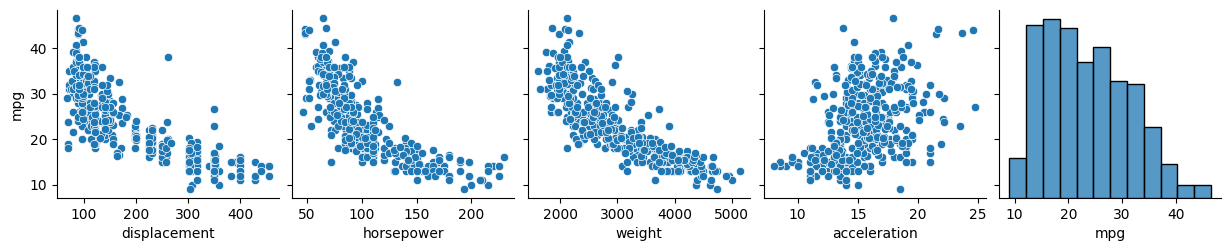

In [101]:
sns.pairplot(Mielage, x_vars = ['displacement', 'horsepower', 'weight', 'acceleration', 'mpg'], y_vars = 'mpg')

<Axes: xlabel='displacement', ylabel='mpg'>

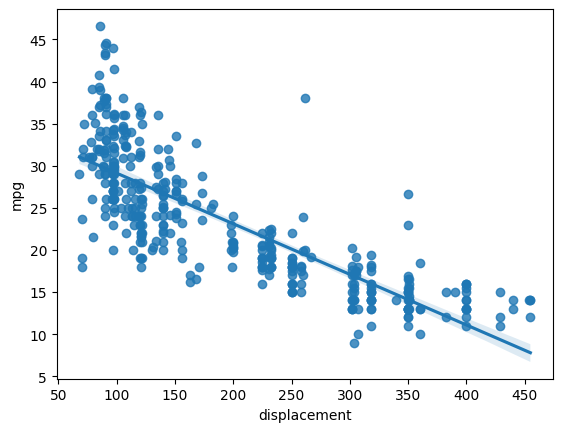

In [102]:
sns.regplot(x = 'displacement', y = 'mpg', data = Mielage)

# Define Target Variable y and Feature X

In [103]:
Mielage.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [104]:
Y = Mielage['mpg']

In [105]:
Y.shape

(392,)

In [106]:
X = Mielage[['displacement', 'horsepower', 'weight', 'acceleration']]

In [107]:
X.shape

(392, 4)

# Scaling Data

In [108]:
from sklearn.preprocessing import StandardScaler

In [109]:
ss = StandardScaler()

In [110]:
X = ss.fit_transform(X)

In [111]:
X

array([[ 1.07728956,  0.66413273,  0.62054034, -1.285258  ],
       [ 1.48873169,  1.57459447,  0.84333403, -1.46672362],
       [ 1.1825422 ,  1.18439658,  0.54038176, -1.64818924],
       ...,
       [-0.56847897, -0.53247413, -0.80463202, -1.4304305 ],
       [-0.7120053 , -0.66254009, -0.41562716,  1.11008813],
       [-0.72157372, -0.58450051, -0.30364091,  1.40043312]])

In [112]:
pd.DataFrame(X).describe()

,0,1,2,3
count,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02
mean,-7.250436e-17,-1.812609e-16,-1.812609e-17,4.350262e-16
std,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00
min,-1.209563e+00,-1.520975e+00,-1.608575e+00,-2.736983e+00
25%,-8.555316e-01,-7.665929e-01,-8.868535e-01,-6.410551e-01
50%,-4.153842e-01,-2.853488e-01,-2.052109e-01,-1.499869e-02
75%,7.782764e-01,5.600800e-01,7.510927e-01,5.384714e-01
max,2.493416e+00,3.265452e+00,2.549061e+00,3.360262e+00


**After standardization mean is 0 and standard deviation is 1**

# Train Test Split Data

In [113]:
from sklearn.model_selection import train_test_split

In [114]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7,random_state=2529)

In [115]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((274, 4), (118, 4), (274,), (118,))

# Linear Regression Model

In [116]:
from sklearn.linear_model import LinearRegression

In [117]:
lr = LinearRegression()

In [118]:
lr.fit(X_train, Y_train)

LinearRegression()

In [119]:
lr.intercept_

23.485738559737584

In [120]:
lr.coef_

array([-1.05767743, -1.68734727, -4.10787617, -0.11495177])

**Mileage = 23.6 - 0.13, Displacemet = -1.42, Horsepower = -5.23, Weight = 0.22 Acceleration + error**

# Predict Test Data

In [121]:
y_pred = lr.predict(X_test)

In [122]:
y_pred

array([18.51865637, 15.09305675, 14.30128789, 23.6753321 , 29.7546115 ,
       23.68796629, 26.61066644, 24.56692437, 15.06260986, 11.94312046,
       24.08050053, 27.96518468, 31.66130278, 31.01309132, 18.32428976,
       19.32795009, 28.08847536, 32.1506879 , 31.15859692, 27.15792144,
       18.82433097, 22.54580176, 26.15598115, 32.36393869, 20.74377679,
        8.78027518, 22.19699435, 18.20614294, 25.00052718, 15.26421552,
       23.13441082, 17.10542257,  9.87180062, 30.00790415, 20.41204655,
       29.11860245, 24.4305187 , 21.72601835, 10.51174626, 13.12426391,
       21.41938406, 19.96113872,  6.19146626, 17.79025345, 22.5493033 ,
       29.34765021, 13.4861847 , 25.88852083, 29.40406946, 22.41841964,
       22.07684766, 16.46575802, 24.06290693, 30.12890046, 10.11318121,
        9.85011438, 28.07543852, 23.41426617, 20.08501128, 30.68234133,
       20.92026393, 26.78370281, 22.9078744 , 14.15936872, 24.6439883 ,
       26.95515832, 15.25709393, 24.11272087, 30.80980589, 14.97

#Predict Train Data

In [123]:
lr.predict(X_train)

array([ 9.09370729, 30.82739379, 20.96919678, 17.19345333, 23.59706083,
       16.09719535, 29.50731561,  9.69217166, 18.14438636, 27.83120758,
       27.89300341, 32.15590072, 28.64024922, 24.75873415, 25.13427592,
       15.8650855 , 29.59775438, 19.16805111, 31.81685439, 11.62035484,
       15.461433  , 29.13919594, 27.12004257, 30.09815986, 29.62548537,
       21.11238846, 26.57447352, 13.02576574, 14.47155289,  7.61401081,
       30.27479398, 23.74532207, 30.44107621, 28.54889027, 23.95165397,
       11.64181219, 31.18293244, 30.02959332, 22.23775154, 10.78338517,
       24.71388145, 30.92039001, 27.80253451, 31.10285039, 31.78620575,
       32.41251121, 29.54325829, 13.41675238, 25.9287047 , 30.04534228,
       24.33390726, 31.150253  , 30.50102797,  7.98581895, 28.41936653,
       23.50033904, 25.26977373, 14.89014614, 28.18240378, 27.27251923,
       28.92126387, 27.26449952, 29.60339408,  9.44922126, 27.3762101 ,
       18.83437091, 31.89992521, 27.70053522, 20.54102145, 25.82

# Model Accuracy

In [124]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error

In [125]:
mean_absolute_error(Y_test, y_pred)

3.3286968643244106

In [126]:
mean_absolute_percentage_error(Y_test, y_pred)

0.14713035779536746

In [127]:
r2_score(Y_test, y_pred)

0.7031250746717691